<a href="https://colab.research.google.com/gist/KhawajaMuddassar/076261632e18b031732f827b31e8b041/deepfakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What are Deepfakes?**
Deepfakery is an image-to-image task that has a very similar underlying theory like semantic segmentation with U-Net and image reconstruction with autoencoders.

Deepfakes are a form of artificial intelligence (AI) generated content, where deep learning models (especially **Generative Adversarial Networks or GANs**) are used to create highly realistic videos, images, or audio recordings that manipulate or alter existing content.They can be used to swap faces in videos, change voices, or even create entirely new synthetic content that appears to be real.

**How Do Deepfakes Work? :**
Imagine you're building an application that allows users to upload an image of a face and then modify the expression however they like, Deepfakes come in handy.

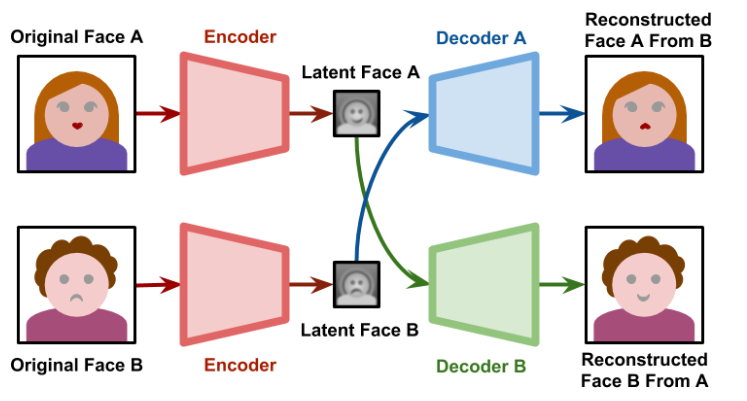

we are passing images of person A and person B through an encoder (Encoder).
Once we get the latent vectors corresponding to person A (Latent Face A) and person B (Latent Face B), we pass the latent vectors through their corresponding decoders (Decoder A and Decoder B) to fetch the corresponding original images (Reconstructed Face A and Reconstructed Face B).we have only one encoder, but two decoders (each decoder corresponding to a different person). The expectation is that the latent vectors obtained from the encoder represent the information about the facial expression present within the image, while the decoder fetches the image corresponding to the person. Once the encoder and the two decoders are trained, while performing deepfake image generation, we switch the connection within our architecture.

When the latent vector of person A is passed through decoder B, the reconstructed face of person B will have the characteristics of person A and vice versa for person B when passed through decoder A.

# **Generating a deepfake**

I trained the model for 200 epochs, which is relatively low due to computational resource limitations. However, for optimal results, it's recommended to train the model for anywhere between 5,000 to 10,000 epochs.

In [ ]:
!pip install -q torch_snippets torch_summary
!pip install -q  wget
from torch_snippets import *
from torch_snippets.paths import Glob
from torch_snippets.loader import read, choose
from torch_snippets.torch_loader import DataLoader, Dataset, Report
import os,sys, cv2, numpy as np, torch, torchvision,subprocess, wget
import torch.nn as nn, torchvision
import torch.optim as optim
from torchsummary import summary
device = 'cuda' if torch.cuda.is_available() else 'cpu'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Directory 'Faceswap-Deepfake-Pytorch' not found. Starting the download and extraction process.

Downloaded: Faceswap-Deepfake-Pytorch.zip

Downloaded random_warp.py successfully.
Error unzipping file: Command '['unzip', '-q', 'Faceswap-Deepfake-Pytorch.zip', '-d', '/content/']' returned non-zero exit status 1.
Loading 349 images from personA and 105 from personB
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 8, 8]           --
|    └─Sequential: 2-1                   [-1, 128, 32, 32]         --
|    |    └─Conv2d: 3-1                  [-1, 128, 32, 32]         9,728
|    |    └─LeakyReLU: 3-2               [-1, 128, 32, 32]         --
|    └─Sequential: 2-2                   [-1, 256, 16, 16]         --
|    |    └─Conv2d: 3-3                  [-1, 256, 16, 16]         819,456
|    |    └─LeakyReLU: 3-4               [-1, 256, 16, 16]         --
|    └─Sequential: 2-3                   [-1, 512, 8, 8]      

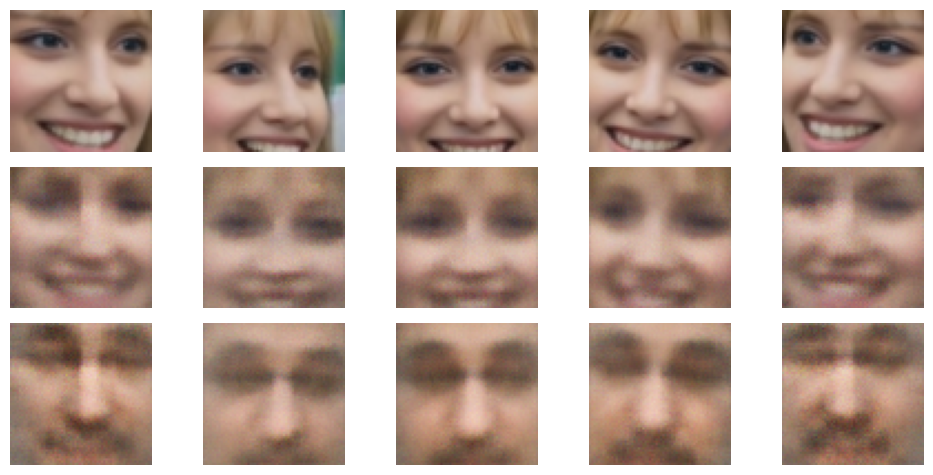

══════════════════════════════B TO A══════════════════════════════


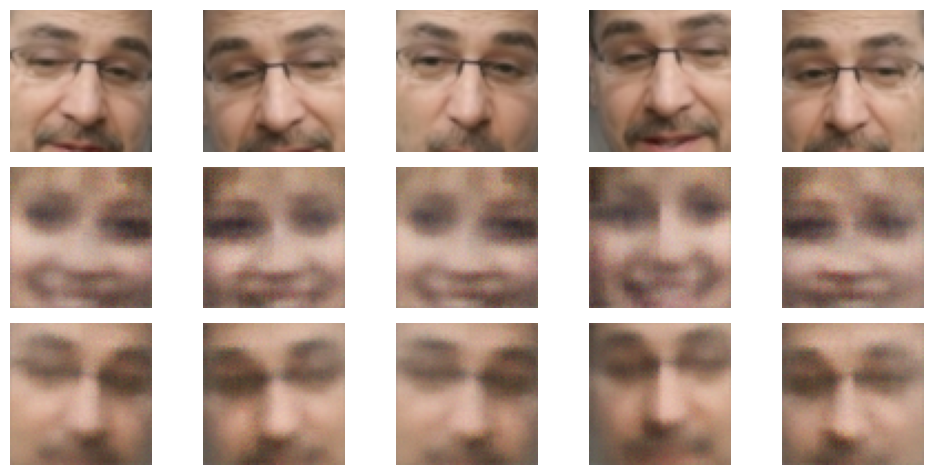

EPOCH: 101.000  lossB: 0.050  lossA: 0.060  (114.70s - 112.43s remaining)
EPOCH: 102.000  lossB: 0.050  lossA: 0.061  (115.75s - 111.21s remaining)
EPOCH: 103.000  lossB: 0.051  lossA: 0.061  (116.80s - 109.99s remaining)
EPOCH: 104.000  lossB: 0.050  lossA: 0.061  (117.84s - 108.77s remaining)
EPOCH: 105.000  lossB: 0.054  lossA: 0.059  (118.87s - 107.55s remaining)
EPOCH: 106.000  lossB: 0.052  lossA: 0.059  (120.00s - 106.42s remaining)
EPOCH: 107.000  lossB: 0.050  lossA: 0.059  (121.32s - 105.44s remaining)
EPOCH: 108.000  lossB: 0.048  lossA: 0.059  (122.61s - 104.45s remaining)
EPOCH: 109.000  lossB: 0.049  lossA: 0.059  (123.86s - 103.41s remaining)
EPOCH: 110.000  lossB: 0.049  lossA: 0.060  (124.92s - 102.21s remaining)
EPOCH: 111.000  lossB: 0.049  lossA: 0.060  (125.98s - 101.01s remaining)
EPOCH: 112.000  lossB: 0.049  lossA: 0.058  (127.03s - 99.81s remaining)
EPOCH: 113.000  lossB: 0.049  lossA: 0.059  (128.08s - 98.61s remaining)
EPOCH: 114.000  lossB: 0.050  lossA: 0.0

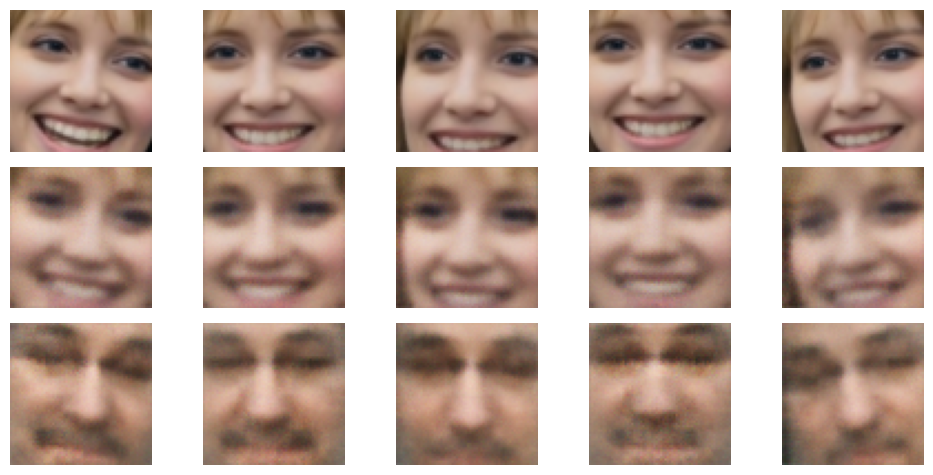

══════════════════════════════B TO A══════════════════════════════


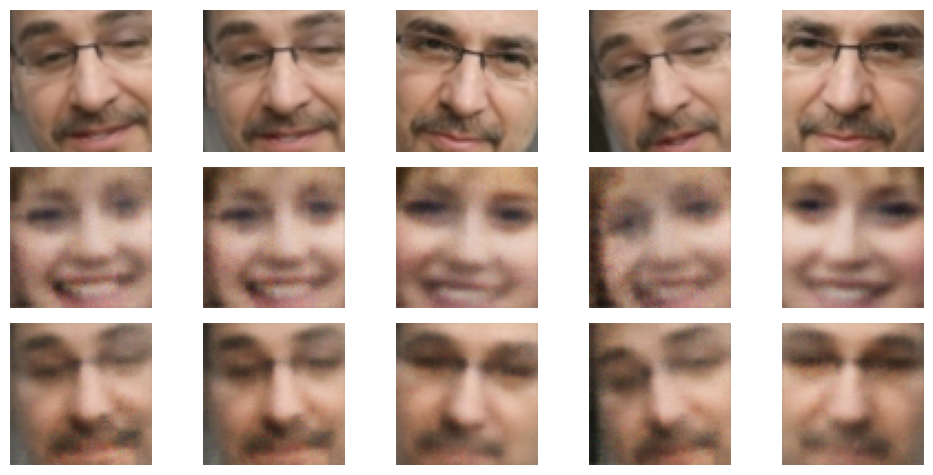

100%|██████████| 301/301 [00:00<00:00, 2504.46it/s]


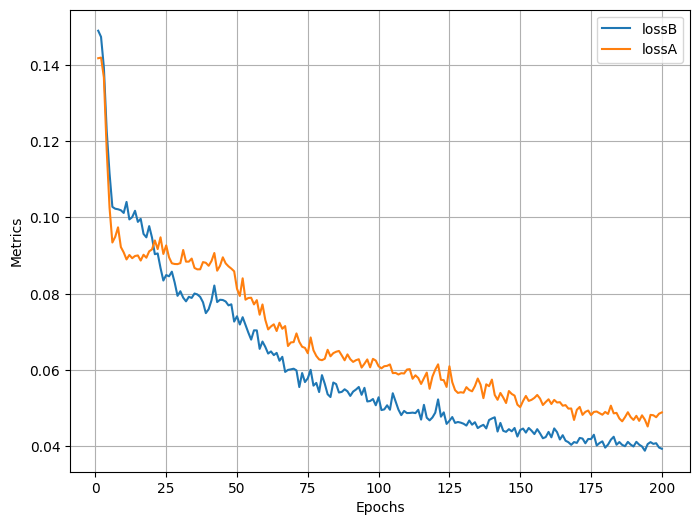

In [ ]:
class DownloadAndPrepare:
    def __init__(self):
        self.face_casecad = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.cropped_faces_personA = !mkdir cropped_faces_personA
        self.cropped_faces_personB = !mkdir cropped_faces_personB

    def get_data(self):
        target_folder = 'Faceswap-Deepfake-Pytorch'
        if not os.path.exists(target_folder):
            print(f"Directory '{target_folder}' not found. Starting the download and extraction process.")
            drive_file_id = '1GncqjA9Ph1tLEEGs0FTonYdXpmGVTOTu'
            drive_url = f"https://drive.google.com/uc?export=download&id={drive_file_id}"
            download_path = 'Faceswap-Deepfake-Pytorch.zip'
            try:
                wget.download(drive_url, download_path)
                print(f"\nDownloaded: {download_path}")
            except Exception as e:
                print(f"Error downloading file from Google Drive: {e}")
                return
            try:
                wget.download('https://raw.githubusercontent.com/KhawajaMuddassar/ssd-utils/refs/heads/main/random_warp.py', 'random_warp.py')
                print("\nDownloaded random_warp.py successfully.")
            except Exception as e:
                print(f"Error downloading random_warp.py: {e}")
                return
            try:
                subprocess.run(['unzip', '-q', download_path, '-d', '/content/'], check=True)
                print(f"Unzipped the file into '{target_folder}' directory.")
            except subprocess.CalledProcessError as e:
                print(f"Error unzipping file: {e}")
                return
            try:
                os.remove(download_path)
                print(f"Removed the zip file: {download_path}")
            except Exception as e:
                print(f"Error removing zip file: {e}")
            print("Download, extraction, and cleanup completed successfully!")
        else:
            print(f"Directory '{target_folder}' already exists. Skipping download and extraction.")

    def CropFace(self,img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_casecad.detectMultiScale(gray,1.3,5)
        if (len(faces)>0):
            for (x,y,h,w) in faces:
                img2 = img[y:(y+h), x:(x+w),:]
            img2 = cv2.resize(img2, (256,256))
            return img2, True
        else:
            return img, False

    def crop_images(self,folder):
        images = Glob(folder+'/*.jpg')
        for i in range(len(images)):
            img = read(images[i],1)
            img2, face_detected = self.CropFace(img)
            if(face_detected==False):
                continue
            else:
                cv2.imwrite('cropped_faces_'+folder+'/'+str(i)+'.jpg',cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))
    def ApplyCrop(self):
        self.crop_images('personA')
        self.crop_images('personB')

class ImageDataset(Dataset):
    def __init__(self, items_A, items_B):
        print(f"Loading {len(items_A)} images from personA and {len(items_B)} from personB")
        if len(items_A) == 0 or len(items_B) == 0:
            raise ValueError("One or both image lists are empty.")
        self.items_A = np.concatenate([read(f,1)[None] for f in items_A])/255.
        self.items_B = np.concatenate([read(f,1)[None] for f in items_B])/255.
        self.items_A += self.items_B.mean(axis=(0, 1, 2)) - self.items_A.mean(axis=(0, 1, 2))
    def __len__(self):
        return min(len(self.items_A), len(self.items_B))
    def __getitem__(self, ix):
        a, b = choose(self.items_A), choose(self.items_B)
        return a, b
    def collate_fn(self, batch):
        sys.path.append(os.path.join(os.getcwd(), '/content'))
        from random_warp import get_training_data
        imsA, imsB = list(zip(*batch))
        imsA, targetA = get_training_data(imsA, len(imsA))
        imsB, targetB = get_training_data(imsB, len(imsB))
        imsA, imsB, targetA, targetB = [torch.Tensor(i).permute(0,3,1,2).to(device) for i in [imsA, imsB, targetA, targetB]]
        return imsA, imsB, targetA, targetB

class Reshape(nn.Module):
    def _ConvLayer(self,input_features, output_features):
        return nn.Sequential(
                nn.Conv2d(input_features, output_features, kernel_size=5, stride=2, padding=2),
                nn.LeakyReLU(0.1, inplace=True) )
    def _UpScale(self,input_features, output_features):
        return nn.Sequential(
                nn.ConvTranspose2d(input_features, output_features, kernel_size=2, stride=2, padding=0),
                nn.LeakyReLU(0.1, inplace=True))
    def forward(self, input):
        output = input.view(-1, 1024, 4, 4) # channel * 4 * 4
        return output

class Autoencoder(nn.Module):
    def __init__(self,reshaper:Reshape):
        super(Autoencoder, self).__init__()
        self.reshaper = reshaper
        self.Reshaper = Reshape()
        self._ConvLayer = reshaper._ConvLayer
        self._UpScale = reshaper._UpScale
        self.encoder = nn.Sequential(
            self._ConvLayer(3, 128),
            self._ConvLayer(128, 256),
            self._ConvLayer(256, 512),
            self._ConvLayer(512, 1024),
            nn.Flatten(),
            nn.Linear(1024 * 4 * 4, 1024),
            nn.Linear(1024, 1024 * 4 * 4),
            self.Reshaper,
            self._UpScale(1024, 512), )
        self.decoder_A = nn.Sequential(
            self._UpScale(512, 256),
            self._UpScale(256, 128),
            self._UpScale(128, 64),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Sigmoid(),)
        self.decoder_B = nn.Sequential(
            self._UpScale(512, 256),
            self._UpScale(256, 128),
            self._UpScale(128, 64),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Sigmoid(),)
    def forward(self, x, select='A'):
        if select == 'A':
            out = self.encoder(x)
            out = self.decoder_A(out)
        else:
            out = self.encoder(x)
            out = self.decoder_B(out)
        return out

class TrainModel:
    def __init__(self, data,dl, Reshaper, epochs=200):
        self.Reshaper = Reshaper
        self.epochs = epochs
        self.data = data
        self.dl = dl
        self.checkpoint = !mkdir checkpoint
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.model = Autoencoder(self.Reshaper).to(self.device)
        self.optimizers =   optim.Adam([{'params':self.model.encoder.parameters()},
                                      {'params':self.model.decoder_A.parameters()}],
                                     lr=5e-5, betas=(0.5,0.999)),\
                            optim.Adam([{'params':self.model.encoder.parameters()},
                                        {'params': self.model.decoder_B.parameters()}],
                                         lr=5e-5, betas=(0.5, 0.999))
        self.criterion = nn.L1Loss()

    def TrainBatch(self, model, data, criterion, optimizers):
        optA, optB = self.optimizers
        optA.zero_grad()
        optB.zero_grad()
        imgA, imgB, targetA, targetB = data
        _imgA, _imgB = self.model(imgA, 'A'), self.model(imgB,'B')
        lossA = self.criterion(_imgA, targetA)
        lossB = self.criterion(_imgB, targetB)
        lossA.backward()
        lossB.backward()
        optA.step()
        optB.step()
        return lossA.item(), lossB.item()

    def ModelTrainer(self):
        self.log = Report(self.epochs)
        for ex in range(self.epochs):
            N = len(self.dl)
            for bx,data in enumerate(self.dl):
                lossA, lossB = self.TrainBatch(self.model,data, self.criterion, self.optimizers)
                self.log.record(ex+(1+bx)/N, lossA=lossA, lossB=lossB, end='\r')
            self.log.report_avgs(ex+1)
            if (ex+1)%100 == 0:
                state = {
                'state': self.model.state_dict(),
                'epoch': ex }
                torch.save(state, './checkpoint/autoencoder.pth')
            if (ex+1)%100 == 0:
                bs = 5
                a,b,A,B = data
                line('A to B')
                _a = self.model(a[:bs], 'A')
                _b = self.model(a[:bs], 'B')
                x = torch.cat([A[:bs],_a,_b])
                subplots(x, nc=bs, figsize=(bs*2, 5))
                line('B to A')
                _a = self.model(b[:bs], 'A')
                _b = self.model(b[:bs], 'B')
                x = torch.cat([B[:bs],_a,_b])
                subplots(x, nc=bs, figsize=(bs*2, 5))
        self.log.plot_epochs()

if __name__ == '__main__':

    downloader = DownloadAndPrepare()
    downloader.get_data()
    downloader.ApplyCrop()

    dataset = ImageDataset(Glob('/content/cropped_faces_personA'), Glob('/content/cropped_faces_personB'))
    dl = DataLoader(dataset, batch_size=32, collate_fn=dataset.collate_fn)

    Reshaper = Reshape()
    model = Autoencoder(Reshaper)
    summary(model, torch.zeros(32,3,64,64), 'A')
    Trainer = TrainModel(dataset,dl,Reshaper)
    Trainer.ModelTrainer()


**Output Structure**

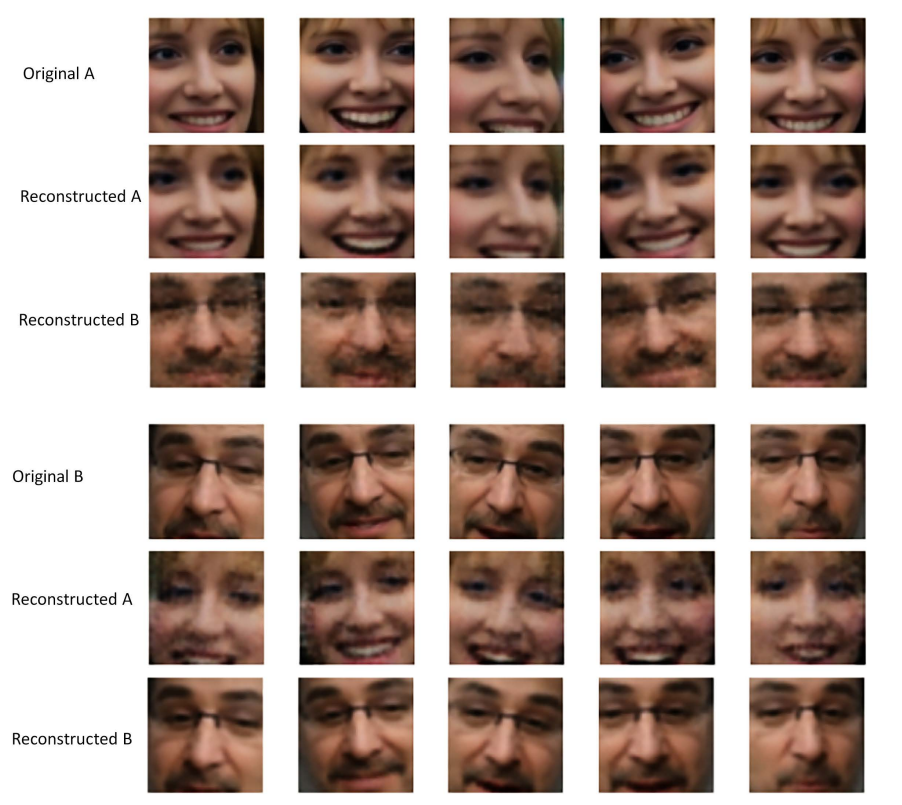